In [113]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from tqdm.autonotebook import tqdm

from experiment.v1dd_client import V1DDClient, V1DDOPhysSession
from experiment.v1dd_em_client import V1DDEMClient
from analysis_tools import set_stylesheet
set_stylesheet()
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
em_client = V1DDEMClient()
ophys_client = V1DDClient("/Users/chase/Desktop/test_v1dd_data")

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:21: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


In [21]:
# This is the EM mouse
MOUSE = 409828

In [12]:
# Load metrics
metrics = pd.read_csv("/Users/chase/Desktop/MindScope/Documents/v1dd-chase/dataframes/v1dd_metrics.csv", index_col=0, low_memory=False)
metrics = metrics[metrics.is_valid & (metrics.mouse == MOUSE)]
metrics.insert(5, "roi_lookup", metrics.apply(lambda row: f"{row.column}-{row.volume}-{row.plane}-{row.roi}", axis=1))
def str_to_int(x):
    try:
        return int(x)
    except:
        return str(x)
metrics["volume"] = metrics.volume.apply(str_to_int)
metrics.head()

,mouse,column,volume,plane,roi,roi_lookup,is_valid,depth,dgf_pref_response,dgf_pref_dir,...,dgw_null_dist_single_std,dgw_resp_pref_dgf,dgf_resp_pref_dgw,ssi,ffsi,ssi_pref_both,ssi_orth,ffsi_all_dirs,spontaneous_event_mean,spontaneous_event_std
M409828_11_1_89,409828,1,1,1,89,1-1-1-89,True,50,0.000943,330.0,...,0.000450,0.000710,0.000586,0.265065,0.419054,0.033453,-0.139243,"[0.41905364, 0.61911654, 0.07141414, -0.801465...",0.000287,0.001903
M409828_11_2_0,409828,1,1,2,0,1-1-2-0,True,66,0.000919,270.0,...,0.000653,0.000394,0.000911,-0.084075,-0.183585,-0.088211,0.064530,"[-0.18358487, 0.04251838, -0.30215508, -0.1352...",0.000346,0.002629
M409828_11_2_1,409828,1,1,2,1,1-1-2-1,True,66,0.011217,0.0,...,0.000538,0.002046,0.009295,-0.065169,-0.139425,-0.157938,0.044509,"[-4.483465, -0.13942526, -0.10395071, 1.0, -1....",0.000341,0.002262
M409828_11_2_2,409828,1,1,2,2,1-1-2-2,True,66,0.001237,120.0,...,0.000582,0.000344,0.000369,0.536319,0.698187,-0.005231,-0.203358,"[-0.3096417, 0.6981869, 0.36546794, 0.25718334...",0.000341,0.002412
M409828_11_2_4,409828,1,1,2,4,1-1-2-4,True,66,0.001093,240.0,...,0.000381,0.000221,0.000660,-0.034136,-0.070685,-0.278688,-0.394162,"[-1.098053, -0.15058127, -0.28383604, -2.51381...",0.000234,0.001601


In [11]:
# Load corresponded cells
corresponded_table = em_client.get_2p_corresponded_table()
corresponded_table.head()

,index,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,roi_lookup,position_microns,axon_proofreading_status,dendrite_proofreading_status
0,0,90,t,session13,plane2_014,92055099945608124,864691132710145793,"[88274, 67650, 5900]",1-3-3-14,"[-112.57258685416217, 379.9149525558736, -318....",not_started,not_started
1,1,55,t,session13,plane0_roi_0060,93180175218572599,864691132760377194,"[92791, 64340, 5745]",1-3-1-60,"[-72.07225703497906, 349.1430176136275, -317.4...",not_started,not_started
2,2,43,t,session13,plane1_roi_0030,91843650048621008,864691132720617684,"[87483, 66110, 5411]",1-3-2-30,"[-119.78729184255074, 360.70596673244506, -336...",not_started,not_started
3,3,95,t,session13,plane4_0119,91070624654826905,864691132741334425,"[84428, 70297, 5418]",1-3-5-119,"[-147.1008040492488, 397.2344828991529, -345.9...",not_started,ariadne_qa
4,4,96,t,session13,plane1_0271,92547337557612090,864691132771662867,"[90300, 66348, 6009]",1-3-2-271,"[-94.38847650736024, 369.8469629730637, -310.8...",not_started,not_started


In [114]:
def roi_lookup_to_roi(roi_lookup):
    column, volume, plane, roi = roi_lookup.split("-")
    column = int(column)
    try: volume = int(volume)
    except: pass
    plane = int(plane)
    roi = int(roi)
    return column, volume, plane, roi

corresponded_table.roi_lookup.apply(roi_lookup_to_roi).head()

0     (1, 3, 3, 14)
1     (1, 3, 1, 60)
2     (1, 3, 2, 30)
3    (1, 3, 5, 119)
4    (1, 3, 2, 271)
Name: roi_lookup, dtype: object

In [67]:
# Create mapping from roi_lookup string to roi_mask, and from roi_lookup string to depth
ophys_roi_mask_and_depth = {} # roi_lookup -> (mask, depth)

corresponded_rois = np.vstack(corresponded_table.roi_lookup.apply(roi_lookup_to_roi).values) # (col, vol, plane, roi)

for column, volume in np.unique(corresponded_rois[:, 0:2], axis=0):
    vol_rois = corresponded_rois[(corresponded_rois[:, 0] == column) & (corresponded_rois[:, 1] == volume)][:, 2:] # (plane, roi)
    sess = ophys_client.load_ophys_session(mouse=MOUSE, column=column, volume=volume)

    for plane, roi in vol_rois:
        roi_lookup = f"{column}-{volume}-{plane}-{roi}"
        mask = sess.get_roi_image_mask(plane=plane, roi=roi)
        depth = sess.get_plane_depth(plane)
        ophys_roi_mask_and_depth[roi_lookup] = (mask, depth)
    

In [80]:
corresponded_voxel_res = corresponded_table.attrs[V1DDEMClient.VOXEL_RESOLUTION_ATTR]
corresponded_table["position_nm_untransformed"] = corresponded_table.pt_position.apply(lambda voxels: voxels * corresponded_voxel_res)
corresponded_table["position_nm_untransformed"].head()

0    [794466.0, 608850.0, 265500.0]
1    [835119.0, 579060.0, 258525.0]
2    [787347.0, 594990.0, 243495.0]
3    [759852.0, 632673.0, 243810.0]
4    [812700.0, 597132.0, 270405.0]
Name: position_nm_untransformed, dtype: object

Text(0, 0.5, 'EM depth, untransformed (nm)')

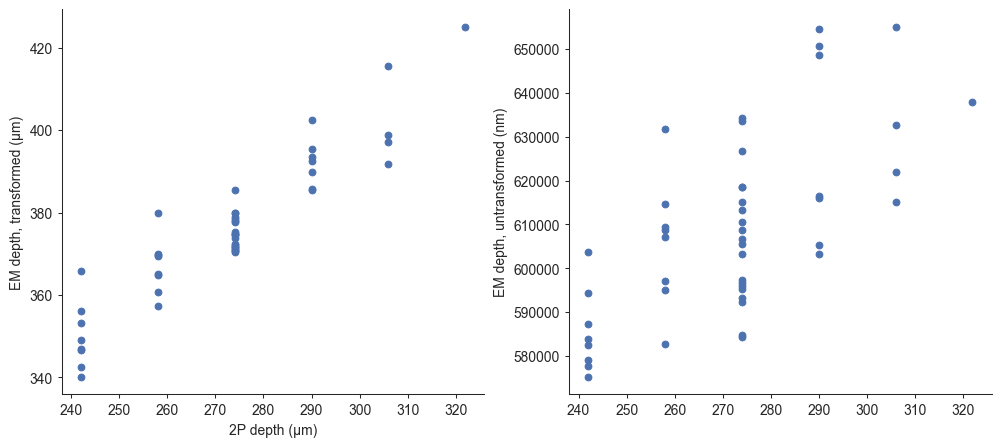

In [85]:
# Scatter plot of 2P ROI depth vs. EM depth
ophys_depth = corresponded_table.roi_lookup.apply(lambda r: ophys_roi_mask_and_depth[r][1])
em_depth_transformed = corresponded_table.position_microns.apply(lambda p: p[1])
em_depth_untransformed = corresponded_table.position_nm_untransformed.apply(lambda p: p[1])

fig, axs = plt.subplots(figsize=(12, 5), ncols=2)
axs[0].scatter(ophys_depth, em_depth_transformed)
axs[0].set_xlabel("2P depth (µm)")
axs[0].set_ylabel("EM depth, transformed (µm)")
axs[1].scatter(ophys_depth, em_depth_untransformed)
axs[1].set_ylabel("EM depth, untransformed (nm)")

  0%|          | 0/20 [00:00<?, ?it/s]

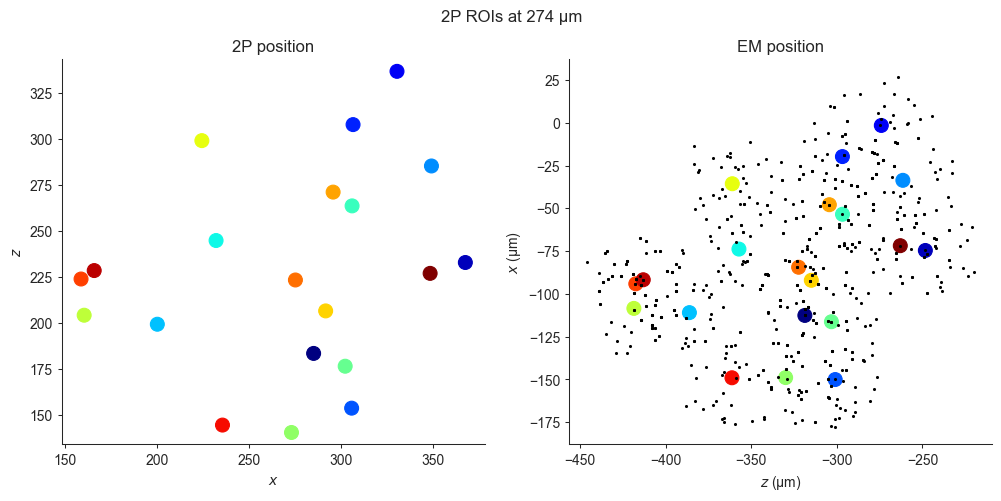

In [193]:
point_size = 100

for depth in ophys_depth.unique():
    fig, axs = plt.subplots(figsize=(12, 5), ncols=2)
    at_depth = ophys_depth == depth
    roi_lookups = corresponded_table.roi_lookup[at_depth]
    ophys_pos = np.zeros((len(roi_lookups), 2))
    for i, roi_lookup in enumerate(roi_lookups):
        ophys_pos[i] = np.mean(np.where(ophys_roi_mask_and_depth[roi_lookup][0]), axis=1)
    em_pos = np.vstack(corresponded_table.position_microns.values[at_depth])
    c = np.arange(len(em_pos))
    axs[0].scatter(ophys_pos[:, 0], ophys_pos[:, 1], c=c, cmap="jet", s=point_size)
    axs[0].set_title("2P position")
    axs[0].set_xlabel("$x$")
    axs[0].set_ylabel("$z$")
    axs[0].axis("equal")
    
    axs[1].scatter(em_pos[:, 2], em_pos[:, 0], c=c, cmap="jet", s=point_size)
    axs[1].set_title("EM position")
    axs[1].set_xlabel("$z$ (µm)")
    axs[1].set_ylabel("$x$ (µm)")

    for pt_root_id in tqdm(corresponded_table.pt_root_id.values[at_depth]):
        nearby = em_client.get_nearby_cells(pt_root_id=pt_root_id, radius_microns=32, drop_duplicates=True)
        nearby_pos = np.vstack(nearby.position_microns.values[nearby.dist_to_center > 0])
        axs[1].scatter(nearby_pos[:, 2], nearby_pos[:, 0], color="black", s=2)
    
    axs[1].axis("equal")

    fig.suptitle(f"2P ROIs at {depth} µm")
    
    break

In [194]:
em_client.get_table_metadata(V1DDEMClient.NUCLEUS_TABLE)

{'created': '2022-02-04T06:06:30.673697',
 'schema': 'nucleus_detection',
 'valid': True,
 'id': 2355,
 'aligned_volume': 'v1dd',
 'table_name': 'nucleus_detection_v0',
 'schema_type': 'nucleus_detection',
 'user_id': '3',
 'notice_text': None,
 'flat_segmentation_source': 'precomputed://https://storage.googleapis.com/v1dd_imagery/v1dd_nuclei/segmentation',
 'write_permission': 'PRIVATE',
 'last_modified': '2022-10-27T17:28:14.043442',
 'description': 'This is the first version of nucleus detection from zetta, it includes all nucleus detections larger than 32 um^3. \r\nUploaded by Forrest Collman on Feb 3 2021.\r\n',
 'reference_table': None,
 'read_permission': 'PUBLIC',
 'voxel_resolution': [1.0, 1.0, 1.0]}

In [195]:
em_client.get_tables()

['ariadne_axon_task',
 'correspondance_pilot',
 'ariadne_multisoma_proofreading_v1',
 'ariadne_dendrite_proofreading_v2',
 'ariadne_axon_proofreading_v1',
 'synapses_v1dd',
 'multisoma_split_task',
 'ariadne_dendrite_task',
 'ophys_examples',
 'manual_central_types',
 'nucleus_detection_v0']

Text(0.5, 1.0, '1-3-1-60 (2P depth: 242 µm; EM depth: 349 µm)')

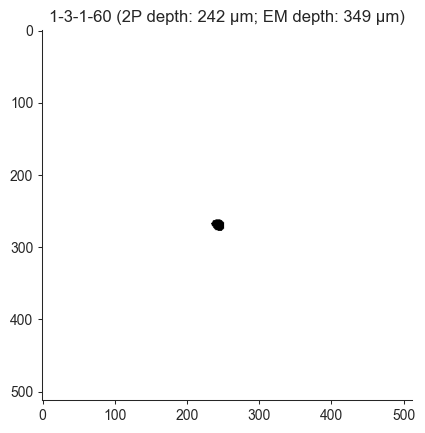

In [105]:
# Plot correspondence for a single ROI
row = corresponded_table.iloc[1]
roi_lookup = row.roi_lookup
column, volume, plane, roi = roi_lookup_to_roi(roi_lookup)

# Plot mask
mask, depth = ophys_roi_mask_and_depth[roi_lookup]
plt.imshow(mask, cmap="gray_r")
plt.title(f"{roi_lookup} (2P depth: {depth} µm; EM depth: {row.position_microns[1]:.0f} µm)")

In [147]:
row.pt_position

array([92791, 64340,  5745])

In [150]:
em_client.get_single_soma_position(row.pt_root_id, units="voxels")

array([834898, 578974, 258390])

In [ ]:
corresponded_table.position_voxels

In [151]:
x_axis = np.arange(0, 76)

x = []
y = []

# How close is each corresponded cell to the neighboring cells?
for pt_root_id in tqdm(corresponded_table.pt_root_id.values):
    nearby_cells = em_client.get_nearby_cells(pt_root_id=pt_root_id, radius_microns=x_axis.max(), drop_duplicates=True)

    for d in x_axis:
        x.append(d)
        y.append(np.sum(nearby_cells.dist_to_center <= d))

x = np.array(x)
y = np.array(y)

  0%|          | 0/48 [00:00<?, ?it/s]

(0.0, 551.83)

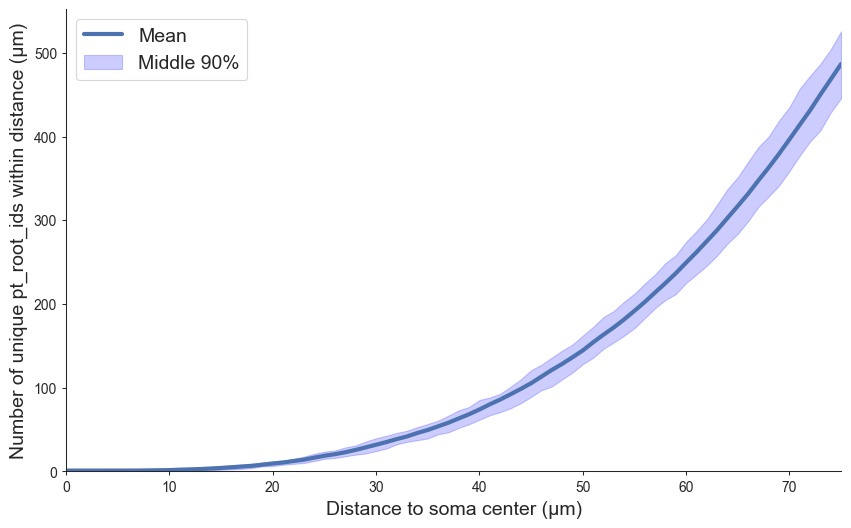

In [136]:
y_mean = []
y_low = []
y_high = []

for d in x_axis:
    yy = y[x == d]
    y_mean.append(np.mean(yy))
    y_low.append(np.quantile(yy, 0.05))
    y_high.append(np.quantile(yy, 0.95))

fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(x, y)
ax.plot(x_axis, y_mean, linewidth=3, label="Mean")
ax.fill_between(x_axis, y_low, y_high, color="blue", alpha=0.2, label="Middle 90%")
ax.set_xlabel("Distance to soma center (µm)", fontsize=14)
ax.set_ylabel("Number of unique pt_root_ids within distance (µm)", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.set_xlim(x_axis.min(), x_axis.max())
ax.set_ylim(0, ax.get_ylim()[1])

In [154]:
# TODO: (1) how many cells in Volume 3? (2) how many are labeled PYC?
corresponded_pos = np.vstack(corresponded_table.position_nm.values)
min_y = corresponded_pos[:, 1].min()
max_y = corresponded_pos[:, 1].max()
padding = 1000
y_bounds = (min_y-padding, max_y+padding)

cells_in_volume_3 = em_client.get_cells_in_box(min_voxels=[0, y_bounds[0], 0], max_voxels=[999999999, y_bounds[1], 999999999])

In [157]:
cells_in_volume_3.pt_root_id.isin(em_client.get_cell_type_table().pt_root_id).mean()

0.027413411938098747

In [89]:
# Load the corresponded cell
em_root_id = row.pt_root_id
em_root_id

864691132710145793

In [73]:
# Load the meshwork
neuron_mw = em_client.get_neuron_meshwork(em_root_id)

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/caveclient/l2cache.py:78: UserWarning: L2Cache is in an experimental stage
  warnings.warn("L2Cache is in an experimental stage", UserWarning)
100%|██████████| 10218/10218 [00:00<00:00, 42048.51it/s]


(371.84886917284865, 388.8080606250764)

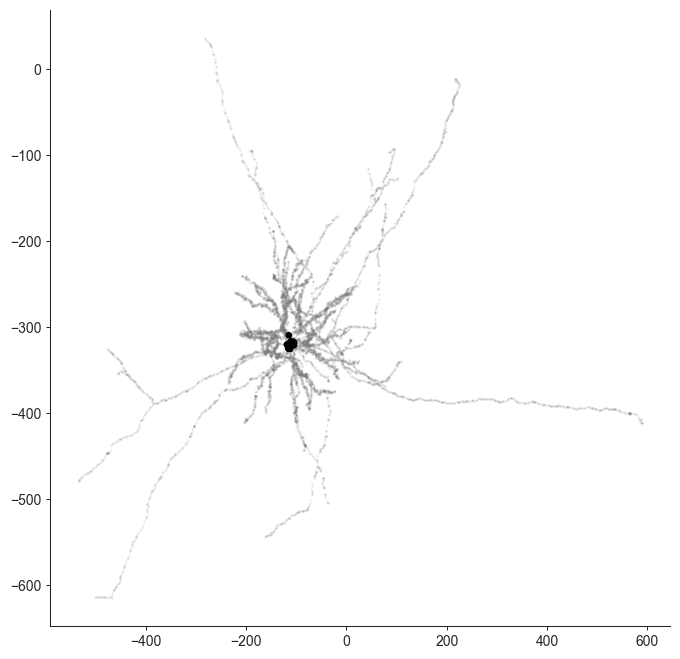

In [110]:
# Plot the cell in XZ (looking from above)
fig, ax = plt.subplots(figsize=(8, 8))
soma_mesh_vertices = em_client.transform_position_to_microns(neuron_mw.mesh.vertices[neuron_mw.root_region])
em_client.plot_neuron_2d(neuron_mw, neuron_plot_dims=(0, 2), highlight_soma=True, ax=ax, color="gray", alpha=0.1)
soma_mesh_vertices[:, 1].min(), soma_mesh_vertices[:, 1].max()